# Project 2: The effect of unrelated features in high-dimensional clustering
The goal of this project is to explore the impact of an increasing number of features that do not contain any information about the clustering on the cluster performance. 

In [171]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, cluster, metrics

In [289]:
class Dataset():
    """
    The dataset class. It creates a synthetic dataset for classification/clustering. 
    n_samples = number of samples in dataset
    n_informative = number of informative feastures
    
    The method add_unrelated_features adds add_n_features features to the exsisting dataset,
    so that the informative features are at the first positions. The unrelated features are 
    randomly distributed either uniformly or gaussian.
    """
    def __init__(self, n_samples, n_informative, random_state=1):
        
        data = datasets.make_classification(n_samples=n_samples, n_features=n_informative, n_informative=n_informative, 
                                        n_redundant=0, n_repeated=0, n_classes=4, n_clusters_per_class=1, 
                                        class_sep=2, hypercube=True, shift=0.0, scale=1.0, shuffle=False,
                                        random_state=random_state)
        self.X = data[0]
        self.Y = data[1]
        self.n_samples = self.X.shape[0]
        self.n_attributes = self.X.shape[1]
        self.n_informative = n_informative

    def add_unrelated_features(self, add_n_features, distribution, plot=False):
        total_features = self.n_attributes + add_n_features 
        
        new_X = np.zeros(shape=(self.n_samples, total_features))

        for i in range(self.n_samples):
            
            if distribution == 'uniform1':
                new_X[i] = np.append(self.X[i], np.random.uniform(-1,1, size=(add_n_features)))
            if distribution == 'uniform2':
                new_X[i] = np.append(self.X[i], np.random.uniform(-2,2, size=(add_n_features)))
            if distribution == 'uniform3':
                new_X[i] = np.append(self.X[i], np.random.uniform(-3,3, size=(add_n_features)))
            if distribution == 'normal':
                new_X[i] = np.append(self.X[i], np.random.normal(size=add_n_features, scale=1))
            if distribution == 'normal2':
                new_X[i] = np.append(self.X[i], np.random.normal(size=add_n_features, scale=2))
            if distribution == 'lognormal':
                new_X[i] = np.append(self.X[i], np.random.lognormal(size=add_n_features))

        self.X = new_X
        self.n_attributes = self.X.shape[1]
        
        if plot==True:
            fig, ax = plt.subplots()
            ax.set_title(f'The distribution of the added non-informative attributes. \n Here {distribution} distribution.')
            plt.hist(np.concatenate(self.X[:,self.n_informative:]))
    
def kmeans(data, k, plot=True):
     
    clust = cluster.KMeans(k, n_init=50).fit(data.X)
    c_labels = clust.labels_
    
    if plot==True:
        plt.rcParams.update({'font.size': 18})
        fig, ax = plt.subplots(figsize=(12,8))
        ax.set_title(f'K-means clustering, {data.n_informative} informative features \n. \
                    {data.n_attributes - data.n_informative} non informative features')
        plt.scatter(data.X[:][:,0],data.X[:][:,1], c=c_labels)

    return metrics.normalized_mutual_info_score(data.Y, c_labels) 
    
def hierarchical_clustering(data, k, plot=True):
    
    clust = cluster.AgglomerativeClustering(k,linkage='ward').fit(data.X)
    c_labels = clust.labels_
    
    if plot==True:
        plt.rcParams.update({'font.size': 18})
        fig, ax = plt.subplots(figsize=(12,8))
        ax.set_title(f'Hierarchical clustering, {data.n_informative} informative features \n. \
                    {data.n_attributes - data.n_informative} non informative features')
        plt.scatter(data.X[:][:,0],data.X[:][:,1], c=c_labels)
    
    return metrics.normalized_mutual_info_score(data.Y, c_labels) 

In [290]:
def run_clustering(algorithm, distribution):
    data = Dataset(1000,2)

    add_n_features = [0, 50, 200, 500, 1000]

    score = []
    features=[]
    for i in range(len(add_n_features)):

        data.add_unrelated_features(add_n_features[i], distribution, False)

        if algorithm == 'kmeans':
            score.append(kmeans(data, 4))
        if algorithm == 'hierarchical':
            score.append(hierarchical_clustering(data,4))

        features.append(sum(add_n_features[:i+1]))

    fig1, ax1 = plt.subplots() 
    ax1.set_title('Normalised mutual information plotted against \n number of added non-informative features.')
    ax1.set_xlabel('Number of non-informative features')
    ax1.set_ylabel('Normalised mutual information score')
    plt.plot(features, score)


In [291]:
def plot_scores():

    add_n_features = [0, 10, 20 ,40, 80, 160, 320, 640, 1280]

    score_kmeans_uniform1 = []
    score_kmeans_uniform2 = []
    score_kmeans_normal = []
    score_kmeans_lognormal =[]
    
    score_kmeans_normal2 = []
    score_hierarchical_uniform1 = []
    score_hierarchical_uniform2 = []
    score_hierarchical_normal = []
    score_hierarchical_normal2 = []
    score_hierarchical_lognormal =[]
    
    features=[]
    
    data = Dataset(1000,2)
    for i in range(len(add_n_features)):
        data.add_unrelated_features(add_n_features[i], 'uniform1', False)

        score_kmeans_uniform1.append(kmeans(data, 4, False))
        score_hierarchical_uniform1.append(hierarchical_clustering(data,4, False))
    
    data = Dataset(1000,2)    
    for i in range(len(add_n_features)):
        data.add_unrelated_features(add_n_features[i], 'uniform2', False)

        score_kmeans_uniform2.append(kmeans(data, 4, False))
        score_hierarchical_uniform2.append(hierarchical_clustering(data,4, False))
    
    data = Dataset(1000,2)    
    for i in range(len(add_n_features)):
        data.add_unrelated_features(add_n_features[i], 'normal', False)

        score_kmeans_normal.append(kmeans(data, 4, False))
        score_hierarchical_normal.append(hierarchical_clustering(data,4, False))
    
    data = Dataset(1000,2)     
    for i in range(len(add_n_features)):
        data.add_unrelated_features(add_n_features[i], 'normal2', False)

        score_kmeans_normal2.append(kmeans(data, 4, False))
        score_hierarchical_normal2.append(hierarchical_clustering(data,4, False))
    
    data = Dataset(1000,2)     
    for i in range(len(add_n_features)):
        data.add_unrelated_features(add_n_features[i], 'lognormal', False)

        score_kmeans_lognormal.append(kmeans(data, 4, False))
        score_hierarchical_lognormal.append(hierarchical_clustering(data,4, False))

        features.append(sum(add_n_features[:i+1]))
    
    plt.rcParams.update({'font.size': 14})
  
    fig1, ax1= plt.subplots(figsize=(12,8))

    ax1.set_title('Kmeans: Normalised mutual information for different \n values of added non-informative features.')
    ax1.set_xlabel('Number of non-informative features')
    ax1.set_ylabel('Normalised mutual information score')
    plt.plot(features, score_kmeans_normal, label= 'N(0,1)')
    plt.plot(features, score_kmeans_normal2, label= 'N(0,2)')
    plt.plot(features, score_kmeans_lognormal, label= 'lognormal(0,1)')
    plt.plot(features, score_kmeans_uniform1, label= 'unif(-1,1)')
    plt.plot(features, score_kmeans_uniform2, label= 'unif(-2,2)')
    plt.legend()
    
    fig2, ax2= plt.subplots(figsize=(12,8))
    ax2.set_title('Hierarcichal clustering: Normalised mutual information for \n different values of added non-informative features.')
    ax2.set_xlabel('Number of non-informative features')
    ax2.set_ylabel('Normalised mutual information score')
    plt.plot(features, score_hierarchical_normal, label= 'N(0,1)')
    plt.plot(features, score_hierarchical_normal2, label= 'N(0,2)')
    plt.plot(features, score_hierarchical_lognormal, label= 'lognormal(0,1)')
    plt.plot(features, score_hierarchical_uniform1, label= 'unif(-1,1)')
    plt.plot(features, score_hierarchical_uniform2, label= 'unif(-2,2)')
    plt.legend()

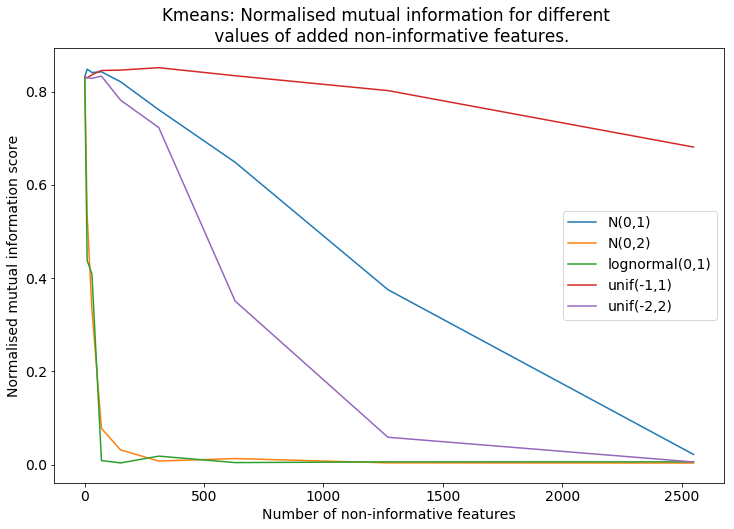

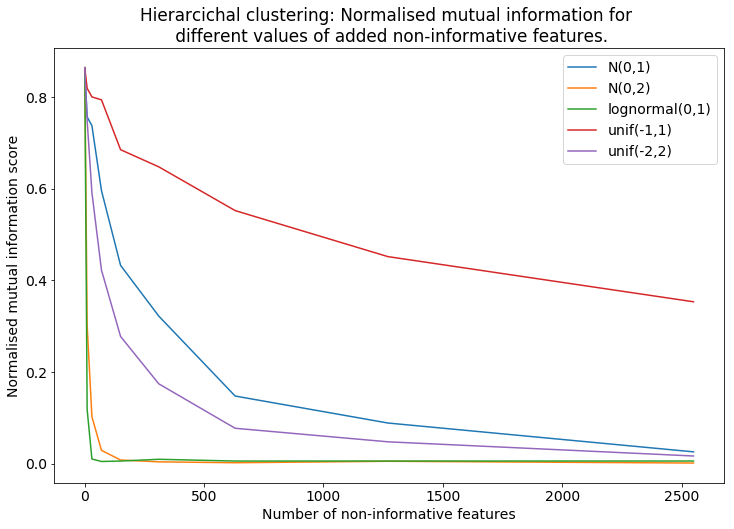

In [292]:
plot_scores()

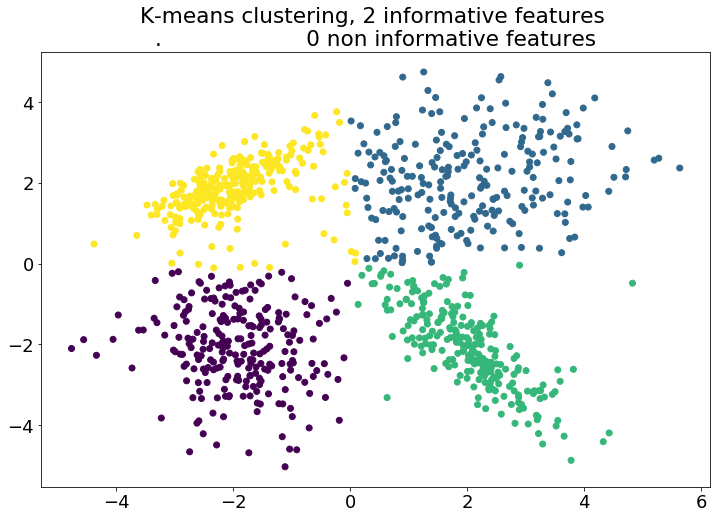

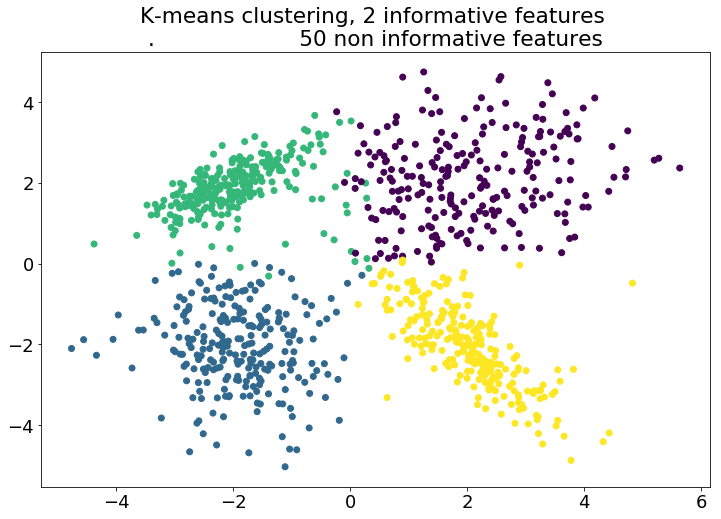

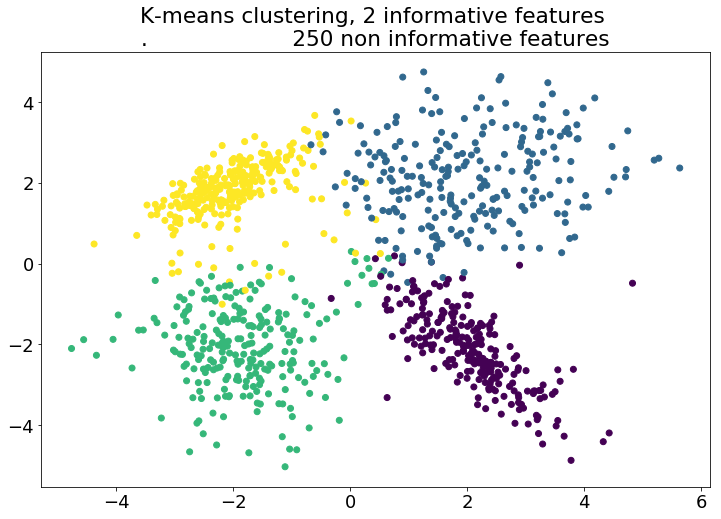

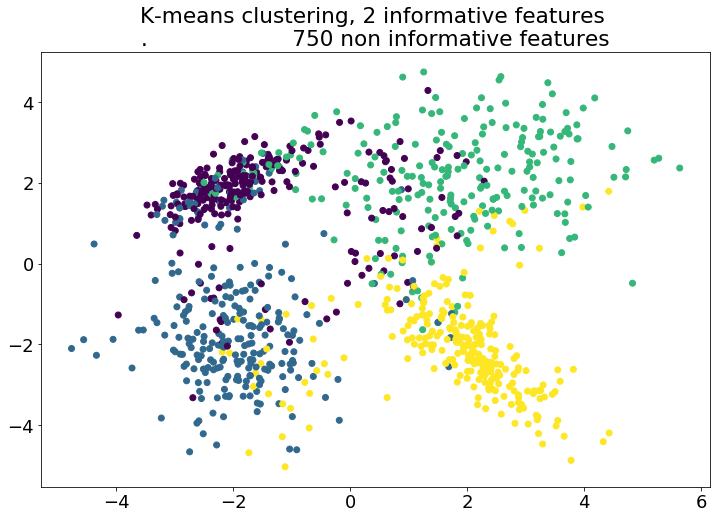

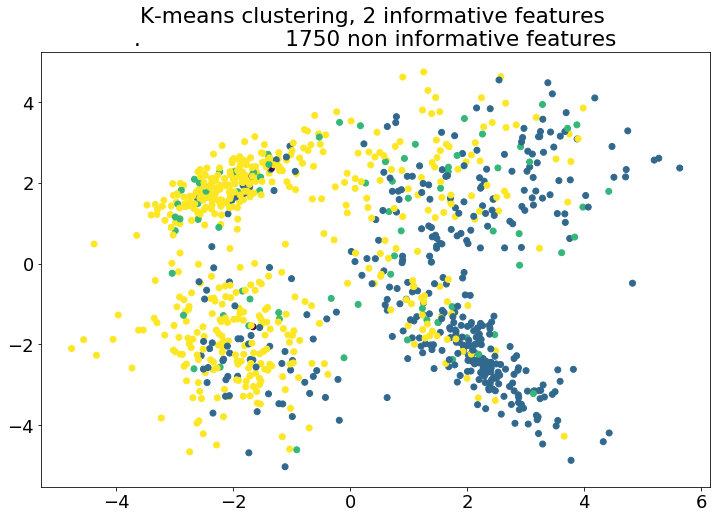

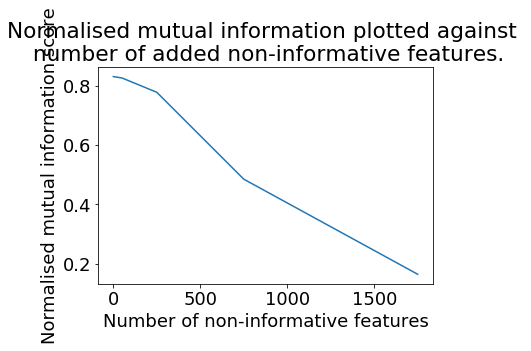

In [293]:
run_clustering('kmeans', 'normal')

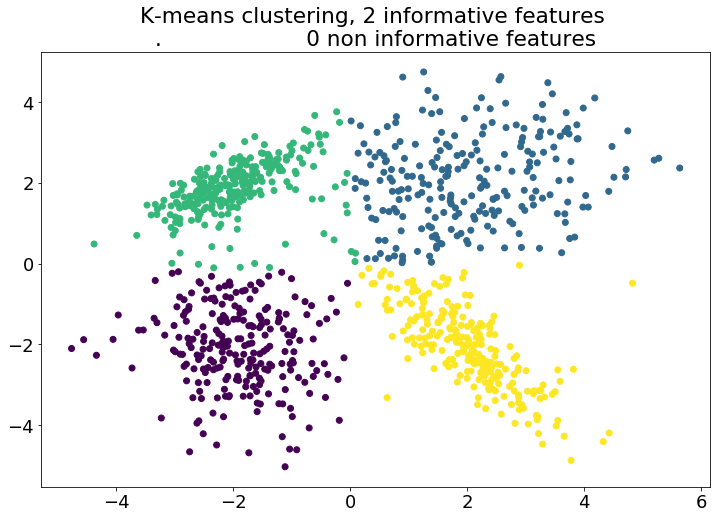

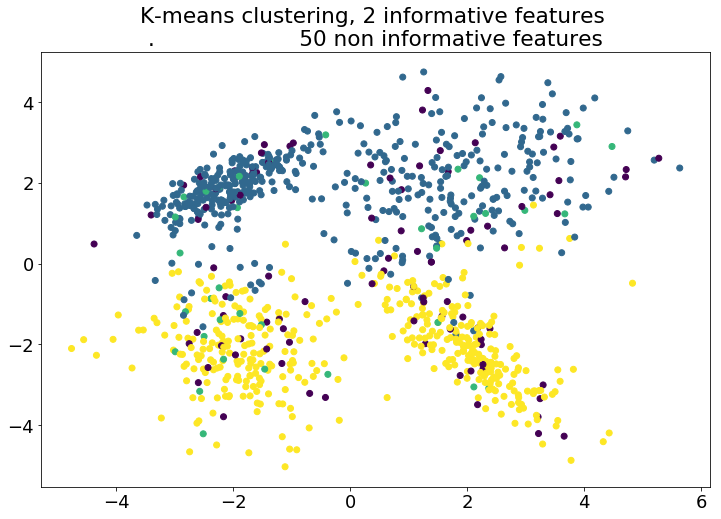

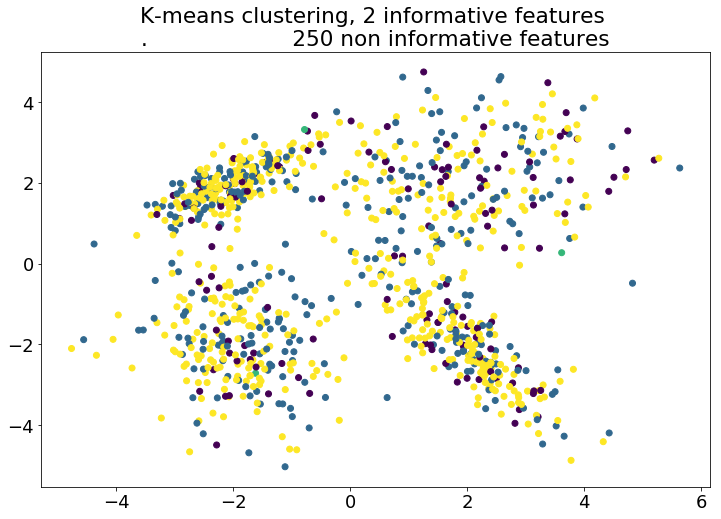

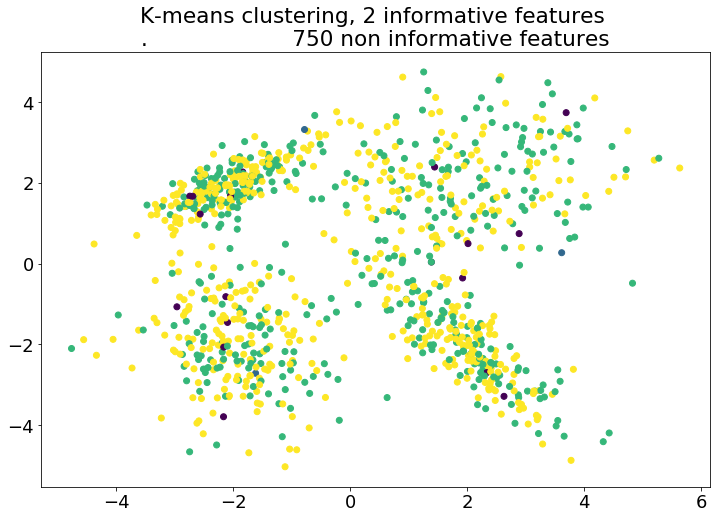

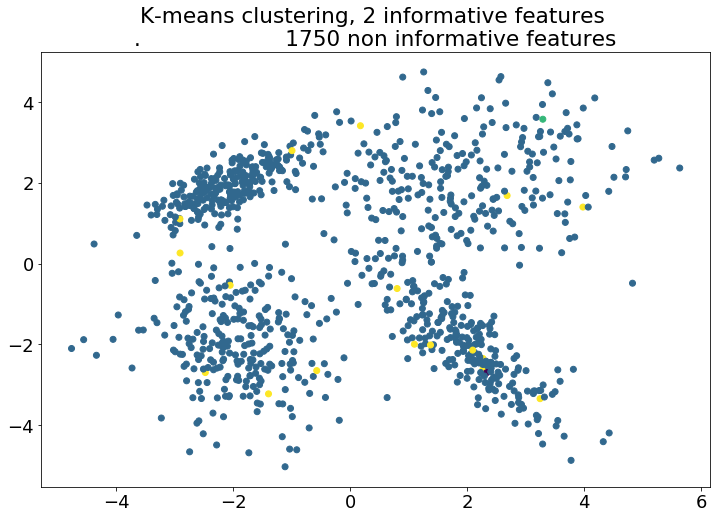

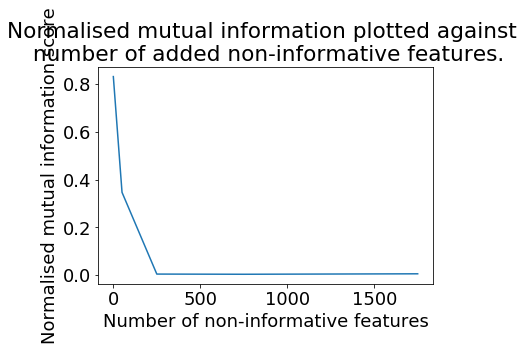

In [294]:
run_clustering('kmeans', 'lognormal')

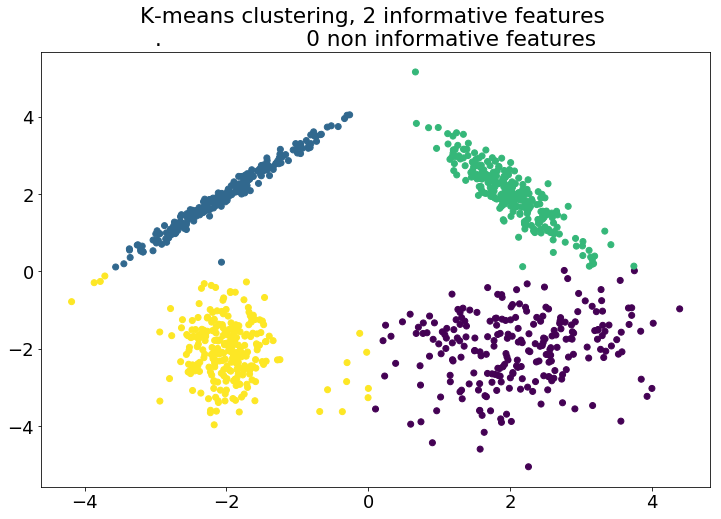

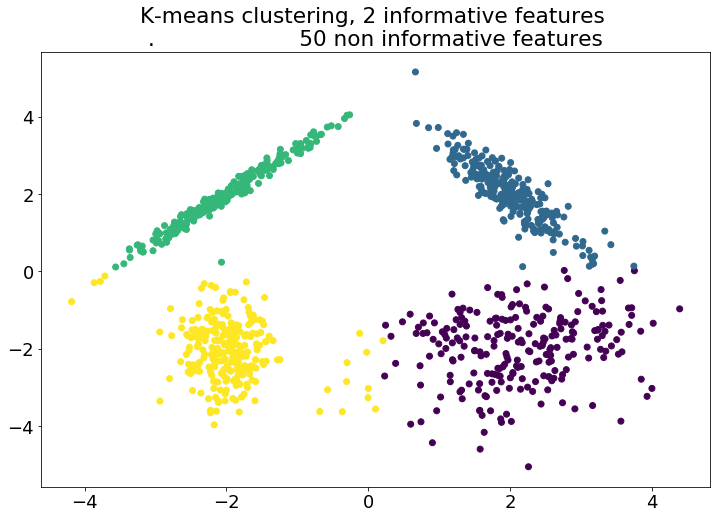

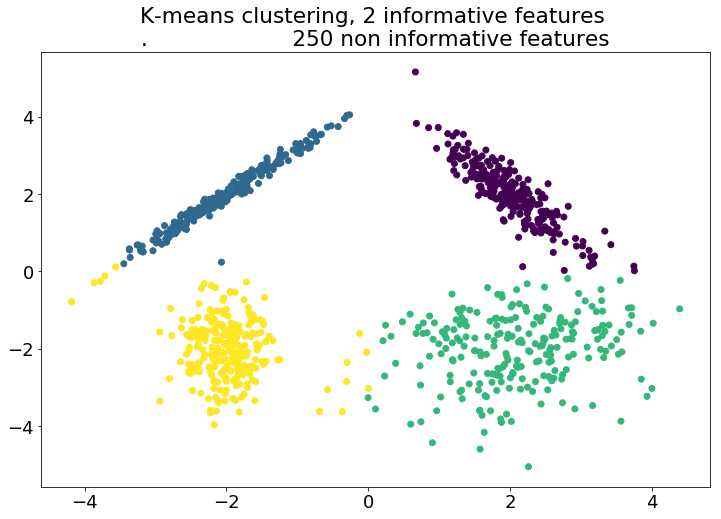

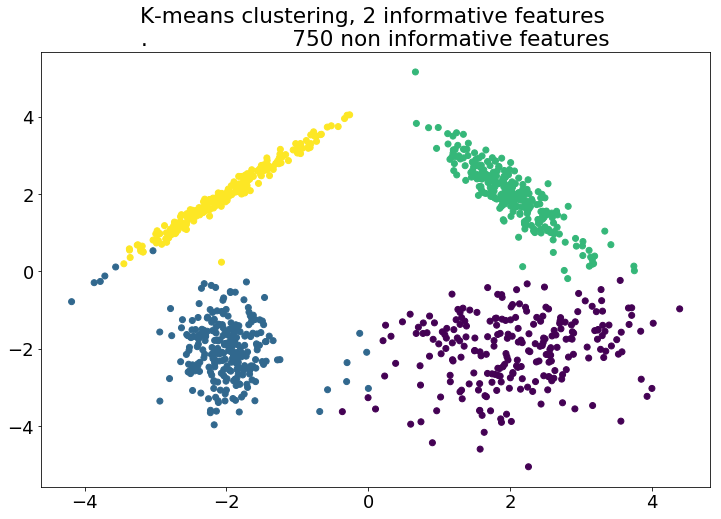

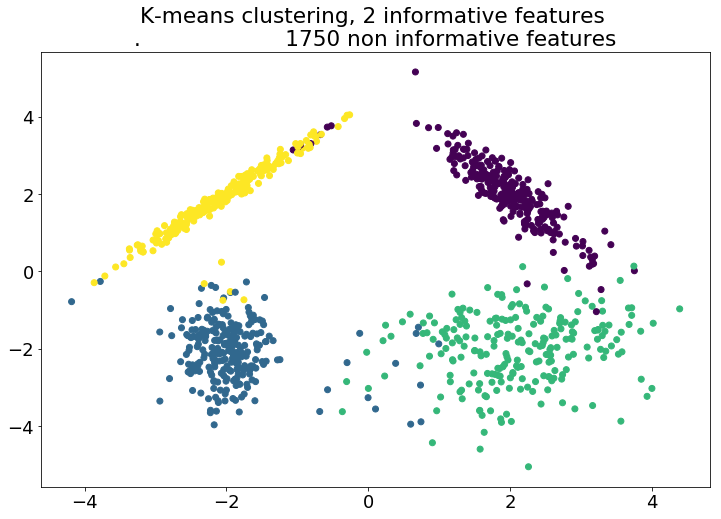

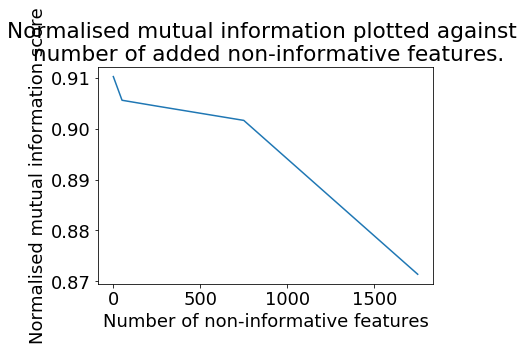

In [257]:
run_clustering('kmeans', 'uniform1')

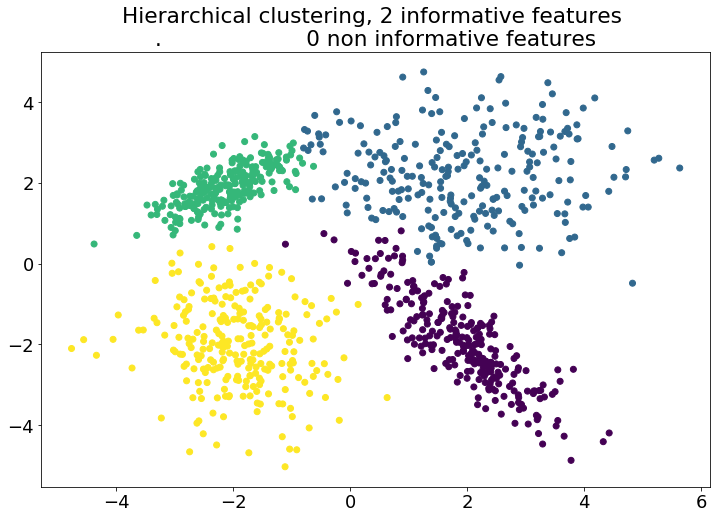

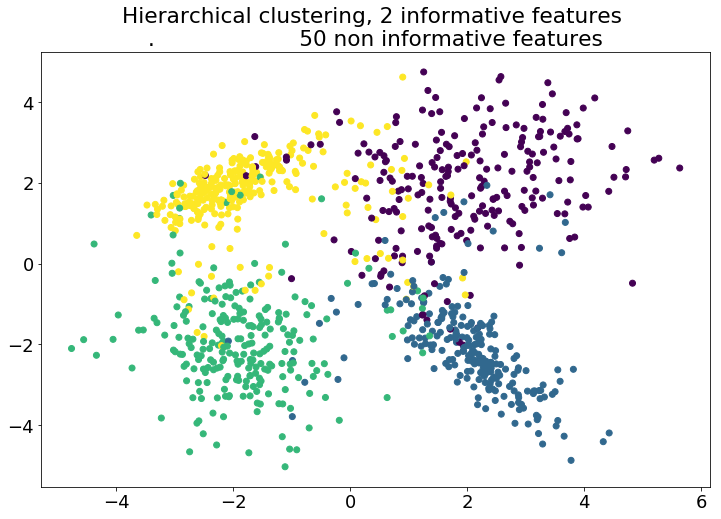

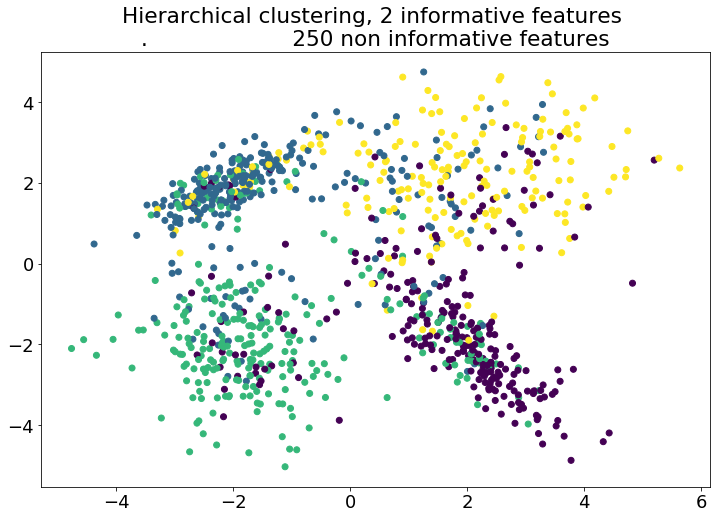

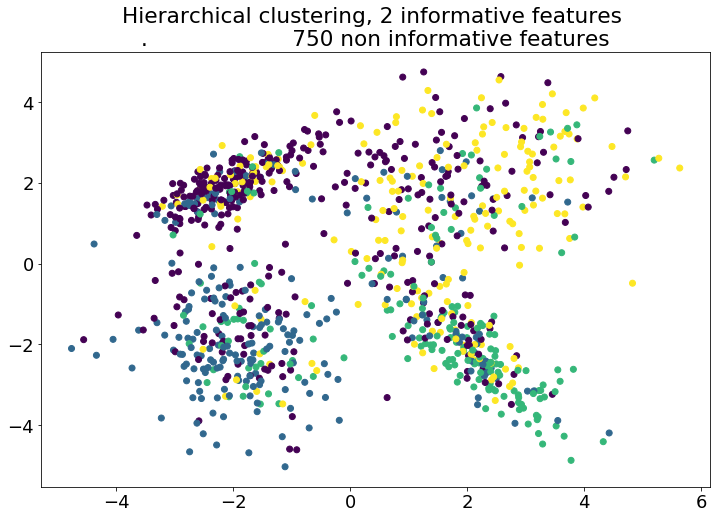

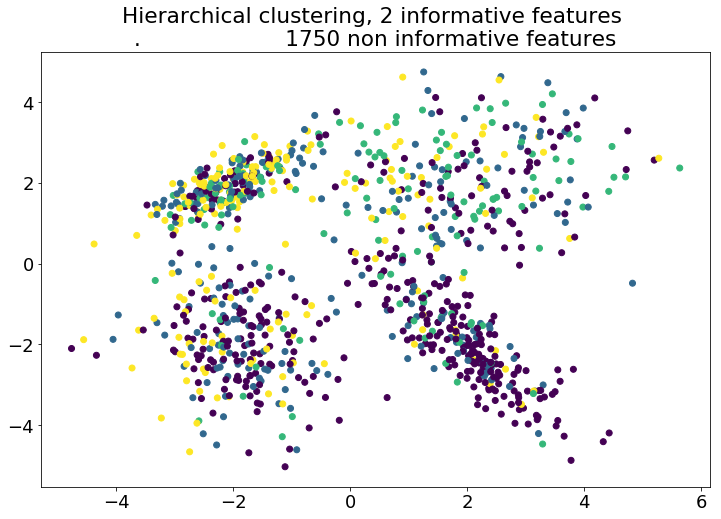

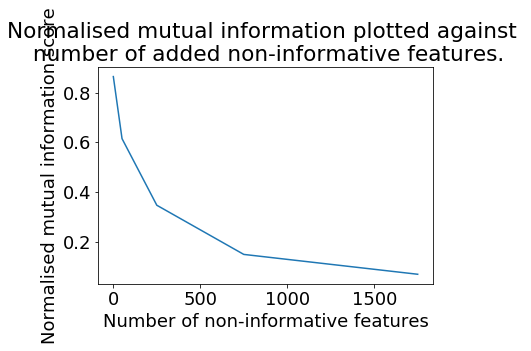

In [295]:
run_clustering('hierarchical', 'normal')

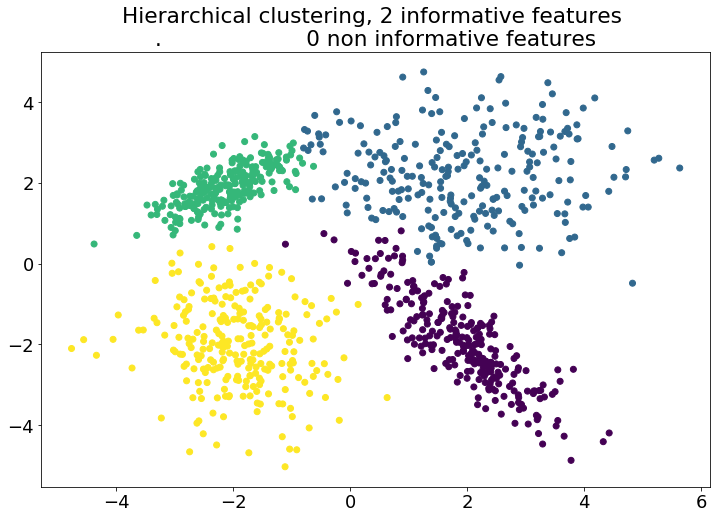

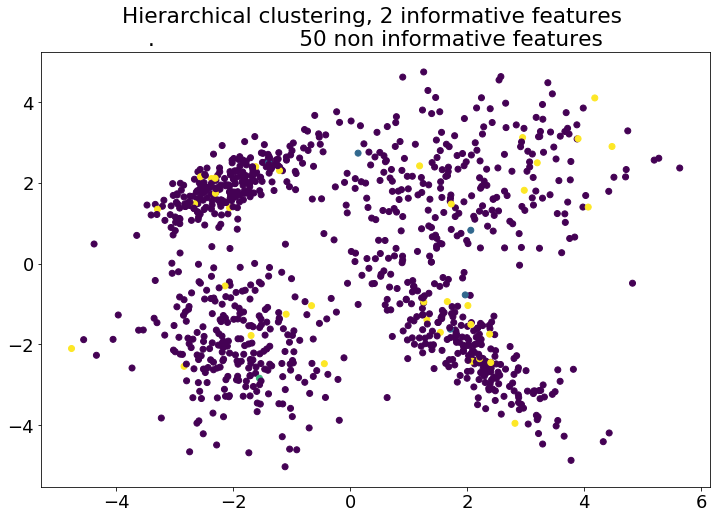

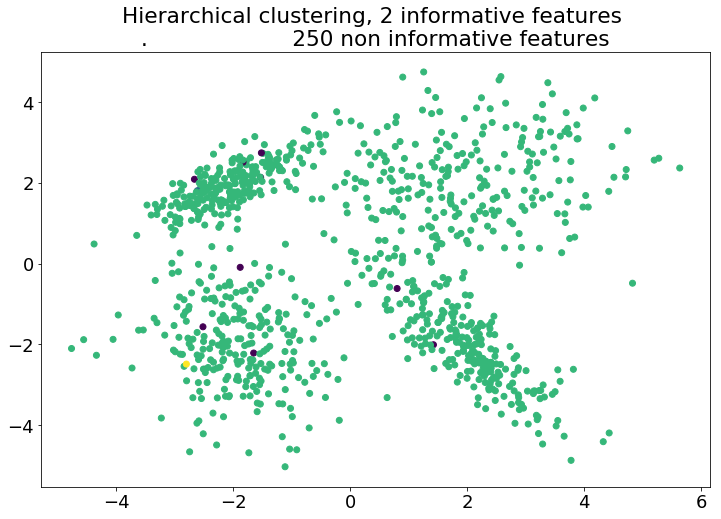

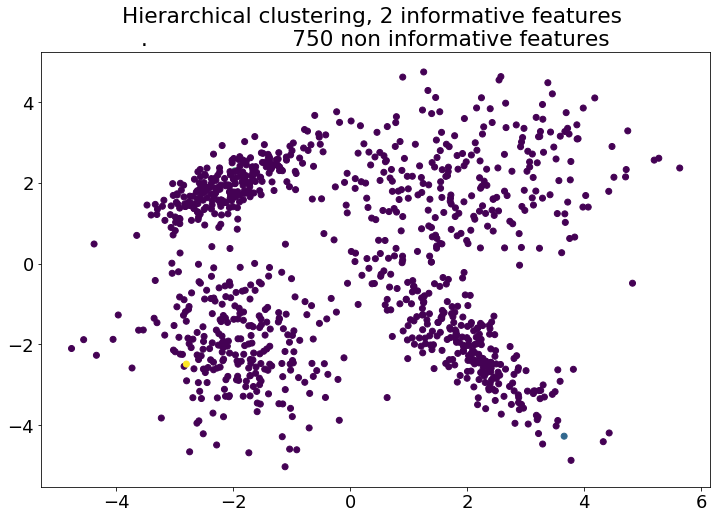

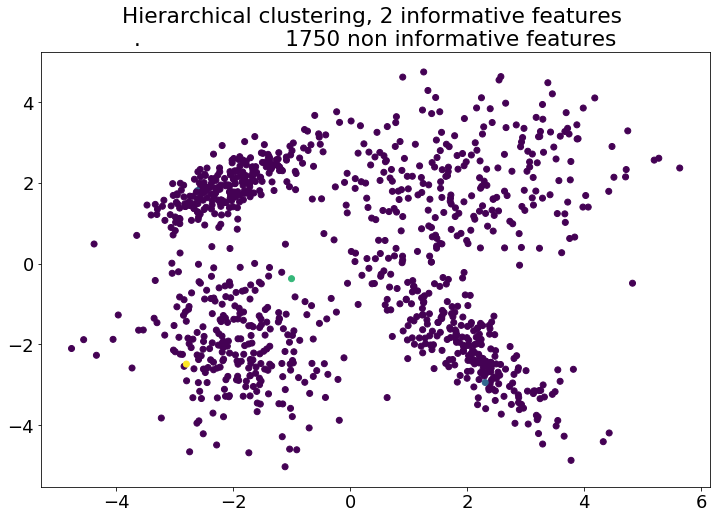

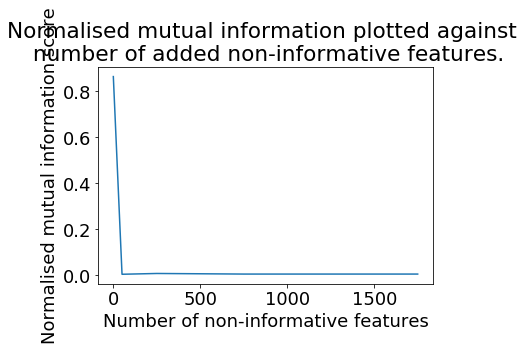

In [296]:
run_clustering('hierarchical', 'lognormal')